# Importing libraries we are going to use

In [246]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import preprocessing, svm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import datetime

# Loading dataframes 

In [247]:
print('original dataframe:')
df = pd.read_csv('sales_train.csv')
print(df.head())
print('shops dataframe:')
shops = pd.read_csv('shops.csv')
print(shops.head())
print('item categories dataframe:')
categories = pd.read_csv('item_categories.csv')
print(categories.head())
print('items dataframe:')
items = pd.read_csv('items.csv')
print(items.head().to_string())

original dataframe:
         date  date_block_num  shop_id  item_id  item_price  item_cnt_day
0  02.01.2013               0       59    22154      999.00           1.0
1  03.01.2013               0       25     2552      899.00           1.0
2  05.01.2013               0       25     2552      899.00          -1.0
3  06.01.2013               0       25     2554     1709.05           1.0
4  15.01.2013               0       25     2555     1099.00           1.0
shops dataframe:
                        shop_name  shop_id
0   !Якутск Орджоникидзе, 56 фран        0
1   !Якутск ТЦ "Центральный" фран        1
2                Адыгея ТЦ "Мега"        2
3  Балашиха ТРК "Октябрь-Киномир"        3
4        Волжский ТЦ "Волга Молл"        4
item categories dataframe:
        item_category_name  item_category_id
0  PC - Гарнитуры/Наушники                 0
1         Аксессуары - PS2                 1
2         Аксессуары - PS3                 2
3         Аксессуары - PS4                 3
4        

# Merging all dataframes into one

In [248]:
df = pd.merge(df, shops, on='shop_id')
df = pd.merge(df, items, on='item_id')
df = pd.merge(df, categories, on='item_category_id')
print(df.head())

         date  date_block_num  shop_id  item_id  item_price  item_cnt_day  \
0  02.01.2013               0       59    22154       999.0           1.0   
1  02.01.2013               0       25    22154       999.0           1.0   
2  03.01.2013               0       25    22154       999.0           1.0   
3  20.01.2013               0       25    22154       999.0           1.0   
4  23.01.2013               0       25    22154       999.0           1.0   

                shop_name          item_name  item_category_id  \
0  Ярославль ТЦ "Альтаир"  ЯВЛЕНИЕ 2012 (BD)                37   
1     Москва ТРК "Атриум"  ЯВЛЕНИЕ 2012 (BD)                37   
2     Москва ТРК "Атриум"  ЯВЛЕНИЕ 2012 (BD)                37   
3     Москва ТРК "Атриум"  ЯВЛЕНИЕ 2012 (BD)                37   
4     Москва ТРК "Атриум"  ЯВЛЕНИЕ 2012 (BD)                37   

  item_category_name  
0     Кино - Blu-Ray  
1     Кино - Blu-Ray  
2     Кино - Blu-Ray  
3     Кино - Blu-Ray  
4     Кино - Blu-Ray  


# Correcting columns with negative value and making month column

In [249]:
df['item_cnt_day'] = abs(df['item_cnt_day'])
df['item_price'] = abs(df['item_price'])

df['month'] = df['date'].str[3:5]
print(df.head())

         date  date_block_num  shop_id  item_id  item_price  item_cnt_day  \
0  02.01.2013               0       59    22154       999.0           1.0   
1  02.01.2013               0       25    22154       999.0           1.0   
2  03.01.2013               0       25    22154       999.0           1.0   
3  20.01.2013               0       25    22154       999.0           1.0   
4  23.01.2013               0       25    22154       999.0           1.0   

                shop_name          item_name  item_category_id  \
0  Ярославль ТЦ "Альтаир"  ЯВЛЕНИЕ 2012 (BD)                37   
1     Москва ТРК "Атриум"  ЯВЛЕНИЕ 2012 (BD)                37   
2     Москва ТРК "Атриум"  ЯВЛЕНИЕ 2012 (BD)                37   
3     Москва ТРК "Атриум"  ЯВЛЕНИЕ 2012 (BD)                37   
4     Москва ТРК "Атриум"  ЯВЛЕНИЕ 2012 (BD)                37   

  item_category_name month  
0     Кино - Blu-Ray    01  
1     Кино - Blu-Ray    01  
2     Кино - Blu-Ray    01  
3     Кино - Blu-Ray    

# Making one row for each item of shop that was sold in every month

In [250]:
df = df.groupby(['item_id', 'item_category_id', 'shop_id', 'date_block_num', 'month', 'item_price'])['item_cnt_day'].sum().reset_index(name='total-sell')
print(df.head())

# This Part Was Only Added For Test
# a = df.groupby(['item_id', 'item_category_id', 'shop_id', 'date_block_num', 'month', 'item_price'])['item_cnt_day'].sum().reset_index(name='total-sell')
# b = df.loc[df['item_id'] == 22145]
# b = b.loc[b['shop_id'] == 25]
# b = b.loc[b['date_block_num'] == 14]
# print(len(b))
# print(b)
# print('%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%')
# b = a.loc[a['item_id'] == 22145]
# b = b.loc[b['shop_id'] == 25]
# b = b.loc[b['date_block_num'] == 14]
# print(len(b))
# print(b)

   item_id  item_category_id  shop_id  date_block_num month  item_price  \
0        0                40       54              20    09        58.0   
1        1                76       55              15    04      4490.0   
2        1                76       55              18    07      4490.0   
3        1                76       55              19    08      4490.0   
4        1                76       55              20    09      4490.0   

   total-sell  
0         1.0  
1         2.0  
2         1.0  
3         1.0  
4         1.0  


# One-Hot-Encode for month & shop

In [251]:
df = pd.get_dummies(df, prefix=['month', 'shop'], columns = ['month', 'shop_id'])
print(df.head())

   item_id  item_category_id  date_block_num  item_price  total-sell  \
0        0                40              20        58.0         1.0   
1        1                76              15      4490.0         2.0   
2        1                76              18      4490.0         1.0   
3        1                76              19      4490.0         1.0   
4        1                76              20      4490.0         1.0   

   month_01  month_02  month_03  month_04  month_05  ...  shop_50  shop_51  \
0         0         0         0         0         0  ...        0        0   
1         0         0         0         1         0  ...        0        0   
2         0         0         0         0         0  ...        0        0   
3         0         0         0         0         0  ...        0        0   
4         0         0         0         0         0  ...        0        0   

   shop_52  shop_53  shop_54  shop_55  shop_56  shop_57  shop_58  shop_59  
0        0        0   

In [258]:
print(df.columns)
columns = ['item_id', 'item_category_id', 'item_price', 'date_block_num']
[columns.append('month_0' + str(i)) if i < 10 else columns .append('month_' + str(i)) for i in range(1, 13)]
[columns.append('shop_' + str(i)) for i in range(0, 60)]
x = df.loc[:, columns]
y = df.loc[:, 'total-sell']
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size = 0.25)
print('train_x:\n', len(train_x))
print('train_y:\n', len(train_y))
print('test_x:\n', len(test_x))
print('test_y:\n', len(test_y))

Index(['item_id', 'item_category_id', 'date_block_num', 'item_price',
       'total-sell', 'month_01', 'month_02', 'month_03', 'month_04',
       'month_05', 'month_06', 'month_07', 'month_08', 'month_09', 'month_10',
       'month_11', 'month_12', 'shop_0', 'shop_1', 'shop_2', 'shop_3',
       'shop_4', 'shop_5', 'shop_6', 'shop_7', 'shop_8', 'shop_9', 'shop_10',
       'shop_11', 'shop_12', 'shop_13', 'shop_14', 'shop_15', 'shop_16',
       'shop_17', 'shop_18', 'shop_19', 'shop_20', 'shop_21', 'shop_22',
       'shop_23', 'shop_24', 'shop_25', 'shop_26', 'shop_27', 'shop_28',
       'shop_29', 'shop_30', 'shop_31', 'shop_32', 'shop_33', 'shop_34',
       'shop_35', 'shop_36', 'shop_37', 'shop_38', 'shop_39', 'shop_40',
       'shop_41', 'shop_42', 'shop_43', 'shop_44', 'shop_45', 'shop_46',
       'shop_47', 'shop_48', 'shop_49', 'shop_50', 'shop_51', 'shop_52',
       'shop_53', 'shop_54', 'shop_55', 'shop_56', 'shop_57', 'shop_58',
       'shop_59'],
      dtype='object')
train_x:

# Linear regression

0.005532392802051644
Coefficients: 
 [-2.64799580e-06 -2.89410845e-03  5.25125595e-05 -4.03084189e-03
 -5.11976329e-02 -1.43276168e-01 -5.00444789e-02 -1.07107102e-01
 -1.30997385e-01 -1.12413785e-01 -2.05550154e-01 -1.55033377e-01
  1.73848930e-01  5.65729704e-02  2.95710742e-01  4.29487440e-01
  3.16848046e-01 -1.37509711e-01 -3.24112619e-01 -5.20081094e-01
 -3.82058502e-01 -4.55179659e-01 -1.46533334e-01 -2.37878308e-01
 -7.12421461e-01  5.77235352e+00 -5.41535172e-01 -7.00916541e-01
  1.05655788e+00 -4.49533420e-01 -2.32125674e-01 -1.01228420e-01
 -2.83153689e-01 -5.55657867e-01 -1.62574707e-01 -2.49588175e-01
  4.31900364e+00 -3.88388855e-01  8.55934481e-02 -4.43796277e-01
 -9.58260666e-02  4.06615646e-01 -1.90422166e-01  3.80263762e-01
  5.35330667e-01 -1.42220344e-01 -3.06458363e-01  7.46947168e-01
 -5.50702516e-01 -7.38272747e-01 -6.81383573e-01 -3.77271327e-01
 -8.23492969e-01 -4.36038381e-01 -2.68611951e-01 -4.57881047e-01
 -3.17352848e-02 -3.22626028e-01  1.71058226e-01 -5.9

C:\Users\parsa\AppData\Local\Temp\ipykernel_7888\3154439731.py:17: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  plt.plot([i for i in range(len(y_predict[:100]))], test_y[:100], color='blue')


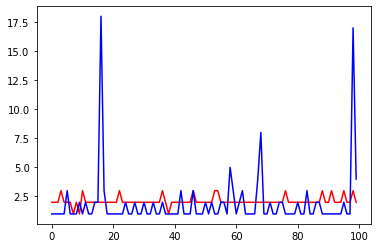

In [260]:
regr = LinearRegression()

regr.fit(train_x, train_y)
print(regr.score(test_x, test_y))

y_predict = regr.predict(test_x)
y_predict = np.around(y_predict).astype(int)

# The coefficients
print("Coefficients: \n", regr.coef_)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(test_y, y_predict))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(test_y, y_predict))

plt.plot([i for i in range(len(y_predict[:100]))], y_predict[:100], color='red')
plt.plot([i for i in range(len(y_predict[:100]))], test_y[:100], color='blue')
plt.show()